In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures

In [49]:
data = pd.read_csv("iris_synthetic_data.csv")

print(data.head())

print(pd.value_counts(data["label"]))

   sepal length  sepal width  petal length  petal width        label
0           5.2          3.8           1.5          0.3  Iris-setosa
1           5.3          4.1           1.5          0.1  Iris-setosa
2           4.8          3.1           1.5          0.2  Iris-setosa
3           5.2          3.7           1.5          0.2  Iris-setosa
4           4.9          3.0           1.5          0.3  Iris-setosa
label
Iris-setosa        1000
Iris-versicolor    1000
Iris-virginica     1000
Name: count, dtype: int64


/tmp/ipykernel_57173/2343115211.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data["label"]))


In [50]:
data["label"] = data["label"].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})



In [51]:
X =data.drop(["label"],axis=1)
Y =data["label"]

In [52]:

x_train ,x_test ,y_train ,y_test =train_test_split(X,Y ,train_size=0.2 ,random_state=42)

model =LogisticRegression(max_iter=1000)

model.fit(x_train ,y_train)

y_pred =model.predict(x_test)

print("accuracy" ,accuracy_score(y_test ,y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


accuracy 0.9895833333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      0.97      0.98       792
           2       0.97      1.00      0.98       800

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400



In [53]:
corr = data.corr()['label'].sort_values(ascending=False)
print(corr)


label           1.000000
petal width     0.962640
petal length    0.956354
sepal length    0.822695
sepal width    -0.451208
Name: label, dtype: float64


In [ ]:
data["petal"] = data["petal length"]+data["petal width"]

In [55]:
X =data.drop(["label"],axis=1)
Y =data["label"]

x_train ,x_test ,y_train ,y_test =train_test_split(X,Y ,train_size=0.2 ,random_state=42)

model =LogisticRegression(max_iter=1000)

model.fit(x_train ,y_train)

y_pred =model.predict(x_test)

print("accuracy" ,accuracy_score(y_test ,y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


accuracy 0.9879166666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      0.96      0.98       792
           2       0.97      1.00      0.98       800

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400



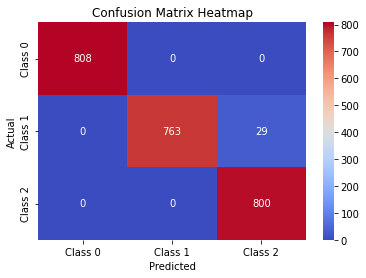

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()